#Exploratory Data Analysis on Book Summary

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests

import string
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
books_data = pd.read_csv('1084 records goodreads_book_summaries.csv', encoding = 'latin1', error_bad_lines=False)
books_data.head()

,title,author,summary,bookcover,book_url
0,The Hunger Games,Suzanne Collins,"Could you survive on your own in the wild, wit...",https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2767052-t...
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2.Harry_P...
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2657.To_K...
3,Pride and Prejudice,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/1885.Prid...
4,The Book Thief,Markus Zusak,Librarian's note: An alternate cover edition c...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/19063.The...


In [71]:
summary = [x.strip() for x in books_data.summary]
summary[1]

'There is a door at the end of a silent corridor. And itâ\x80\x99s haunting Harry Pottterâ\x80\x99s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the loomiThere is a door at the end of a silent corridor. And itâ\x80\x99s haunting Harry Pottterâ\x80\x99s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop

# Data pre-processing

In [72]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re

filtered_sum=[]


filtered_sent=[]
for i in range(len(summary)):
    summary_ = re.sub("[^A-Za-z" "]+"," ",summary[i])
    summary_ = re.sub("[0-9" "]+"," ",summary[i])
    
    summary_ = summary_.lower()
    summary_ =summary_.split()
    summary_ = [wordnet.lemmatize(word) for word in summary_ if not word in set(stopwords.words('english'))]
    summary_ = ' '.join(summary_)
    filtered_sum.append(summary_)

In [73]:

    
with open("negative-words.txt","r", encoding='latin-1') as neg:
    negwords = neg.read().split("\n")

In [74]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

## Vectorization

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_sum)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
summary_df =pd.DataFrame(denselist, columns=feature_names)
summary_df.head()

,aa,aan,aaron,ababa,aback,abagail,abalternate,abandon,abandoned,abandoning,...,zulu,zum,zumindest,zur,zusak,zwergâ,zwischen,zylska,²s,â¾
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0813,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis

## Wordcloud

In [76]:
#plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = ' '.join(summary_df)



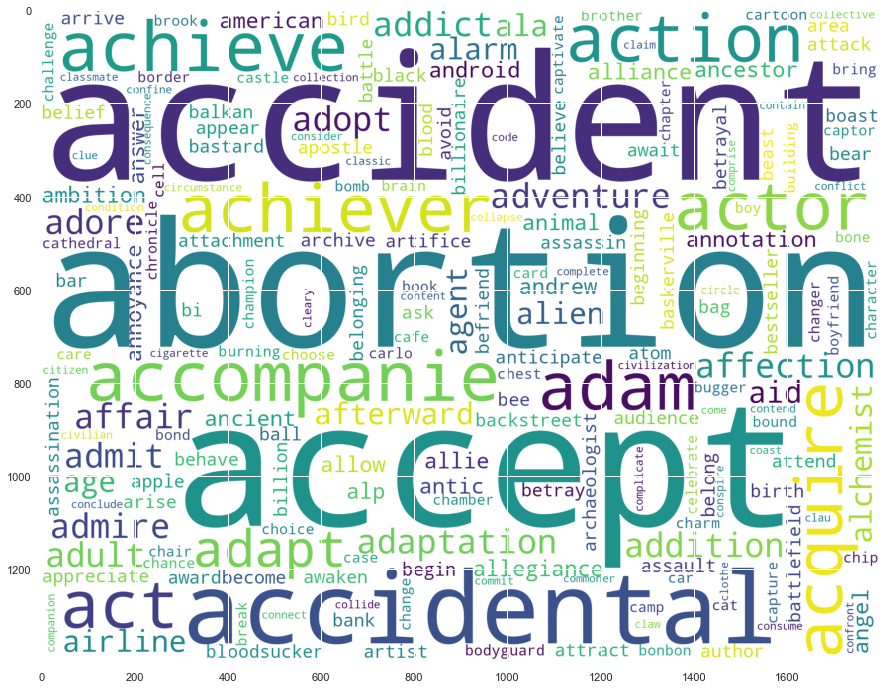

In [77]:
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'white',
        width = 1800,
        height =1400).generate(cloud)
plt.imshow(wordcloud)

## Positive words

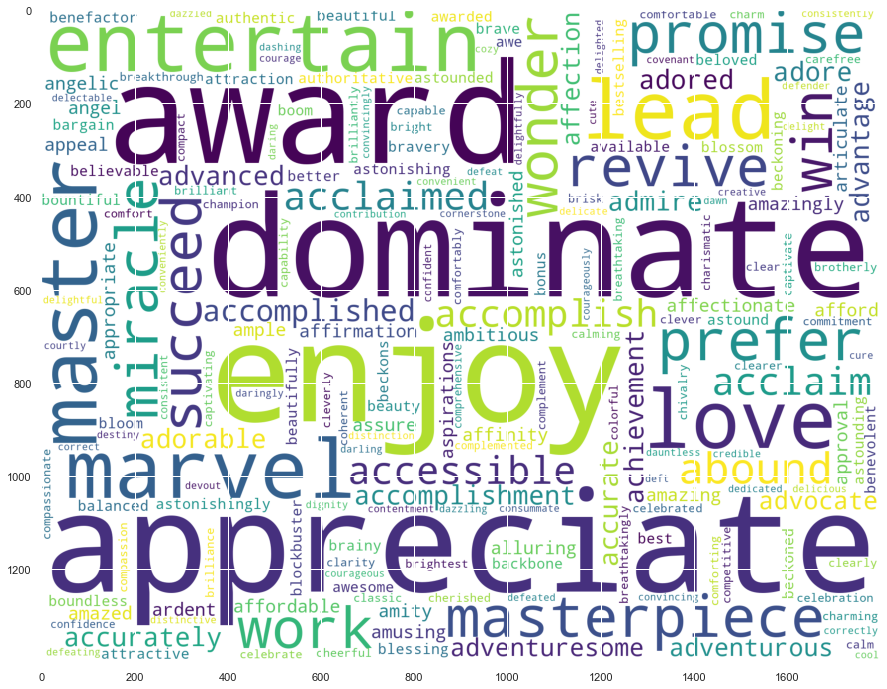

In [78]:
f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in summary_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'white',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

## negative Words

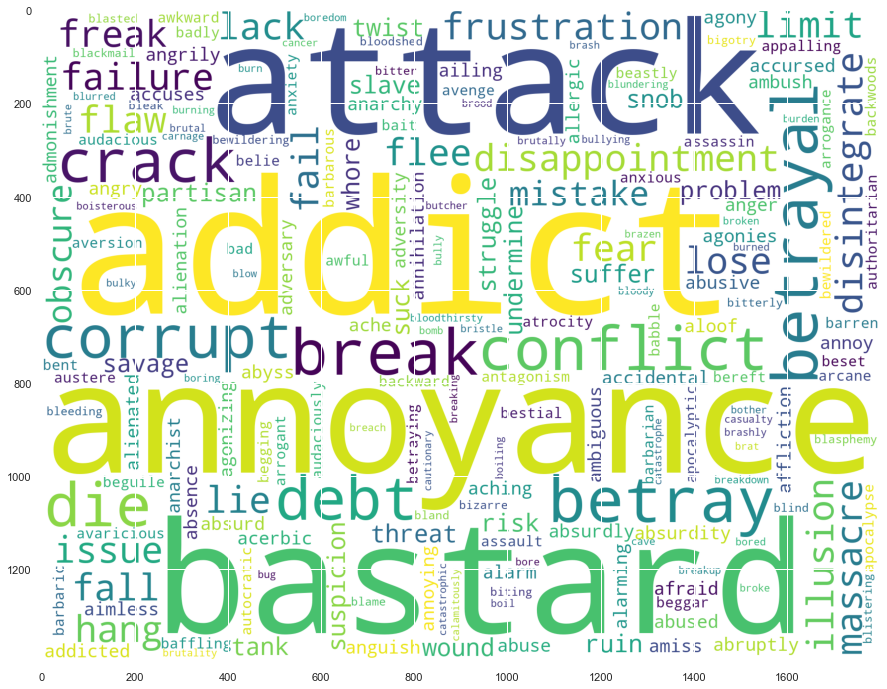

In [79]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in summary_df if w in negwords])

cloud_neg = WordCloud(
        background_color='white',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)

In [80]:
books_data["filtered_summary"] = filtered_sum
books_data.head()

,title,author,summary,bookcover,book_url,filtered_summary
0,The Hunger Games,Suzanne Collins,"Could you survive on your own in the wild, wit...",https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2767052-t...,"could survive wild, every one make sure live s..."
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2.Harry_P...,door end silent corridor. itâs haunting harr...
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2657.To_K...,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/1885.Prid...,alternate cover edition isbn since immediate s...
4,The Book Thief,Markus Zusak,Librarian's note: An alternate cover edition c...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/19063.The...,librarian's note: alternate cover edition foun...


In [124]:
#!pip install textblob

In [82]:
from textblob import TextBlob
books_data['textblob_sentiment'] = books_data['filtered_summary'].apply(lambda x: TextBlob(x).sentiment[0])
books_data['Unique Terms'] = books_data['filtered_summary'].str.split().explode().drop_duplicates().groupby(level=0).apply(list)

## Calculating Subjectivity and polarity
<b>Subjectivity</b> is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective,

while <b>polarity</b> simply means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment

In [86]:
from textblob import TextBlob

def calc_subj(sum_):
    return TextBlob(sum_).sentiment.subjectivity
 
# function for Polarity
def calc_pola(sum_):
    return TextBlob(sum_).sentiment.polarity
 
books_data['Subjectivity'] = books_data.filtered_summary.apply(calc_subj)
books_data['Polarity'] = books_data.filtered_summary.apply(calc_pola)
books_data[["title","Subjectivity", "Polarity"]].head()

,title,Subjectivity,Polarity
0,The Hunger Games,0.533987,0.029947
1,Harry Potter and the Order of the Phoenix,0.348667,-0.074000
2,To Kill a Mockingbird,0.386813,0.174359
3,Pride and Prejudice,0.644444,0.462963
4,The Book Thief,0.361905,-0.015079


## Affinity score finds out the semantic relations between the words

In [87]:
with open("afinn2.txt","r") as affin:
    affinity = affin.read().split("\n")

In [88]:
affinity_data = pd.read_csv('afinn2.txt', sep="\t", header=None, names=["word", "value"])
affinity_data.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [89]:
affinity_scores = affinity_data.set_index('word')['value'].to_dict()
#affinity_scores

In [90]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [91]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [92]:
books_data['sentiment_value'] = books_data['filtered_summary'].apply(calculate_sentiment)
books_data[["title", "summary", "sentiment_value"]].head()

,title,summary,sentiment_value
0,The Hunger Games,"Could you survive on your own in the wild, wit...",-22
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,1
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,24
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,38
4,The Book Thief,Librarian's note: An alternate cover edition c...,-3


In [93]:
# how many words are in the sentence?
books_data['word_count'] = books_data['filtered_summary'].str.split().apply(len)
books_data[["title", "summary", "word_count", "sentiment_value"]].head()

,title,summary,word_count,sentiment_value
0,The Hunger Games,"Could you survive on your own in the wild, wit...",123,-22
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,111,1
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,113,24
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,100,38
4,The Book Thief,Librarian's note: An alternate cover edition c...,128,-3


In [192]:
books_data.word_count.max()

485

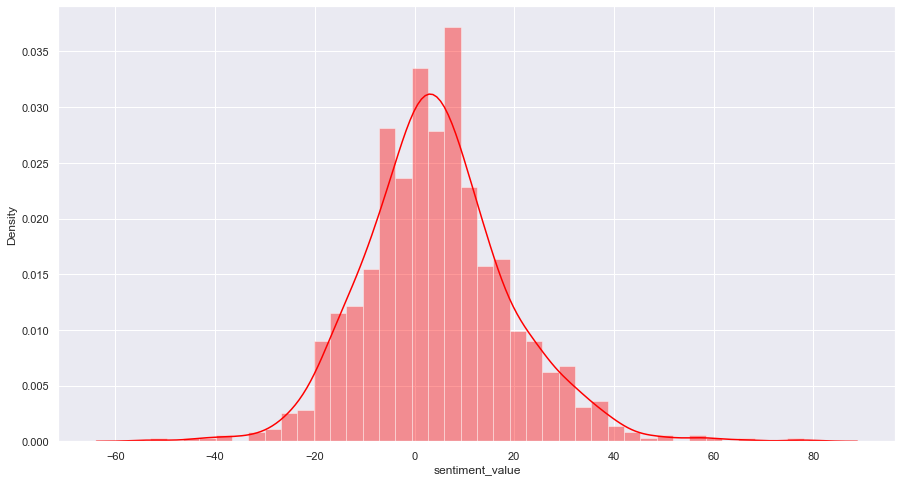

In [94]:
f, axes = plt.subplots(figsize= (15,8))

sns.distplot(books_data['sentiment_value'],color = "red")
plt.show()

<AxesSubplot:ylabel='sentiment_value'>

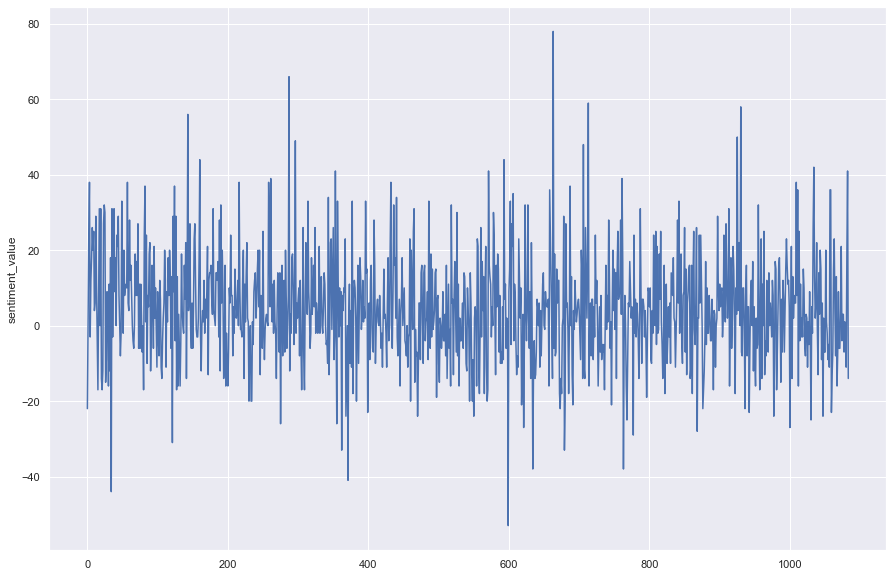

In [123]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x= books_data.index.values, data=books_data)

## Subjectivity and Polarity Analysis

In [96]:
#!pip install cufflinks

In [97]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
#pio.renderers.default = "colab"

<AxesSubplot:xlabel='Polarity', ylabel='Subjectivity'>

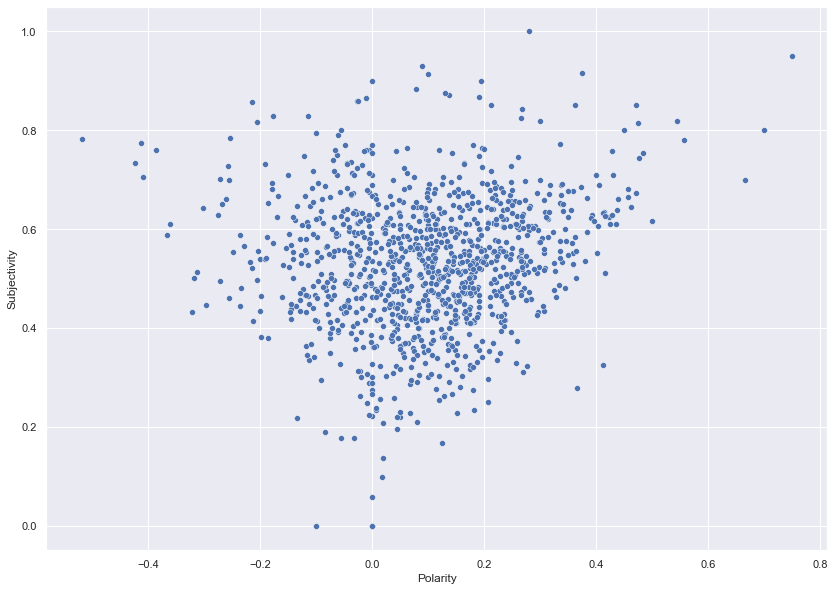

In [98]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=books_data, x="Polarity", y="Subjectivity")

array([   0,    1,    2, ..., 1081, 1082, 1083], dtype=int64)

# Emotion classification using NRC Lexicon
The package contains approximately 27,000 words and is based on the National Research Council Canada (NRC) affect lexicon and the NLTK library’s WordNet synonym sets.

## Raw emotion scores

In [99]:
#!pip install NRCLex
import nltk
from nrclex import NRCLex

In [100]:
emotion_ = NRCLex(books_data[4:5].filtered_summary[4])

In [101]:
emotion_.raw_emotion_scores


{'trust': 11,
 'anticipation': 5,
 'joy': 3,
 'positive': 11,
 'anger': 3,
 'disgust': 3,
 'fear': 7,
 'negative': 9,
 'sadness': 4,
 'surprise': 4}

In [102]:
anger=[];disgust=[];fear=[];joy=[];surprise=[];trust=[];anticipation=[];sadness=[];positive=[];negative=[]
emotions= ["anger","disgust","fear","joy","surprise","trust","anticipation","sadness","positive","negative"]


for i,j in enumerate(books_data.filtered_summary.values,0):
  #print(i)
    emotion = NRCLex(j)

  if "positive" in emotion.raw_emotion_scores.keys():
    positive.append(emotion.raw_emotion_scores['positive'])
  else:
    positive.append(0)


  if "anger" in emotion.raw_emotion_scores.keys():
    anger.append(emotion.raw_emotion_scores['anger'])
  else:
    anger.append(0)

  if "disgust" in emotion.raw_emotion_scores.keys():
    disgust.append(emotion.raw_emotion_scores['disgust'])
  else:
    disgust.append(0)

  if "fear" in emotion.raw_emotion_scores.keys():
    fear.append(emotion.raw_emotion_scores['fear'])
  else:
    fear.append(0)

  if "joy" in emotion.raw_emotion_scores.keys():
    joy.append(emotion.raw_emotion_scores['joy'])
  else:
    joy.append(0)

  if "surprise" in emotion.raw_emotion_scores.keys():
    surprise.append(emotion.raw_emotion_scores['surprise'])
  else:
    surprise.append(0)

  if "trust" in emotion.raw_emotion_scores.keys():
    trust.append(emotion.raw_emotion_scores['trust'])
  else:
    trust.append(0)

  if "anticipation" in emotion.raw_emotion_scores.keys():
    anticipation.append(emotion.raw_emotion_scores['anticipation'])
  else:
    anticipation.append(0)

  if "sadness" in emotion.raw_emotion_scores.keys():
    sadness.append(emotion.raw_emotion_scores['sadness'])
  else:
    sadness.append(0)

  if "negative" in emotion.raw_emotion_scores.keys():
    negative.append(emotion.raw_emotion_scores['negative'])
  else:
    negative.append(0)
  




In [103]:
emotions_df = pd.DataFrame(list(zip(anger, anticipation, disgust, fear, joy, negative,positive, sadness, surprise, trust)),
               columns =['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'])
emotions_df.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,8,8,10,9,6,16,11,11,5,5
1,14,7,5,15,6,18,18,13,5,10
2,2,4,2,5,8,8,15,5,1,2
3,5,15,2,3,22,8,26,0,3,15
4,3,5,3,7,3,9,11,4,4,11


In [104]:
books_data_EDA = pd.concat([books_data, emotions_df], axis=1)
books_data_EDA.head()

,title,author,summary,bookcover,book_url,filtered_summary,textblob_sentiment,Unique Terms,Subjectivity,Polarity,...,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,The Hunger Games,Suzanne Collins,"Could you survive on your own in the wild, wit...",https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2767052-t...,"could survive wild, every one make sure live s...",0.029947,"[could, survive, wild,, every, one, make, sure...",0.533987,0.029947,...,8,8,10,9,6,16,11,11,5,5
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2.Harry_P...,door end silent corridor. itâs haunting harr...,-0.074000,"[door, end, silent, corridor., itâs, hauntin...",0.348667,-0.074000,...,14,7,5,15,6,18,18,13,5,10
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/2657.To_K...,unforgettable novel childhood sleepy southern ...,0.174359,"[unforgettable, novel, childhood, sleepy, sout...",0.386813,0.174359,...,2,4,2,5,8,8,15,5,1,2
3,Pride and Prejudice,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/1885.Prid...,alternate cover edition isbn since immediate s...,0.462963,"[alternate, cover, edition, isbn, since, immed...",0.644444,0.462963,...,5,15,2,3,22,8,26,0,3,15
4,The Book Thief,Markus Zusak,Librarian's note: An alternate cover edition c...,https://i.gr-assets.com/images/S/compressed.ph...,https://www.goodreads.com//book/show/19063.The...,librarian's note: alternate cover edition foun...,-0.015079,"[librarian's, note:, found, hereit, nazi, germ...",0.361905,-0.015079,...,3,5,3,7,3,9,11,4,4,11


In [171]:
#The hunger ganes
viz_ex = books_data_EDA[['anger','anticipation', 'disgust', 'fear', 'joy','sadness', 'surprise', 'trust', 'negative', 'positive']][0:1]
viz_ex

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,0.065041,0.065041,0.081301,0.073171,0.04878,0.089431,0.04065,0.04065,0.130081,0.089431


In [174]:
for emotion in emotions:
    books_data_EDA[emotion] = books_data_EDA[emotion] / books_data_EDA['word_count']

In [175]:
emotions

['anger',
 'disgust',
 'fear',
 'joy',
 'surprise',
 'trust',
 'anticipation',
 'sadness',
 'positive',
 'negative']

Text(0.5, 0.98, 'Book Title: The Hunger Games')

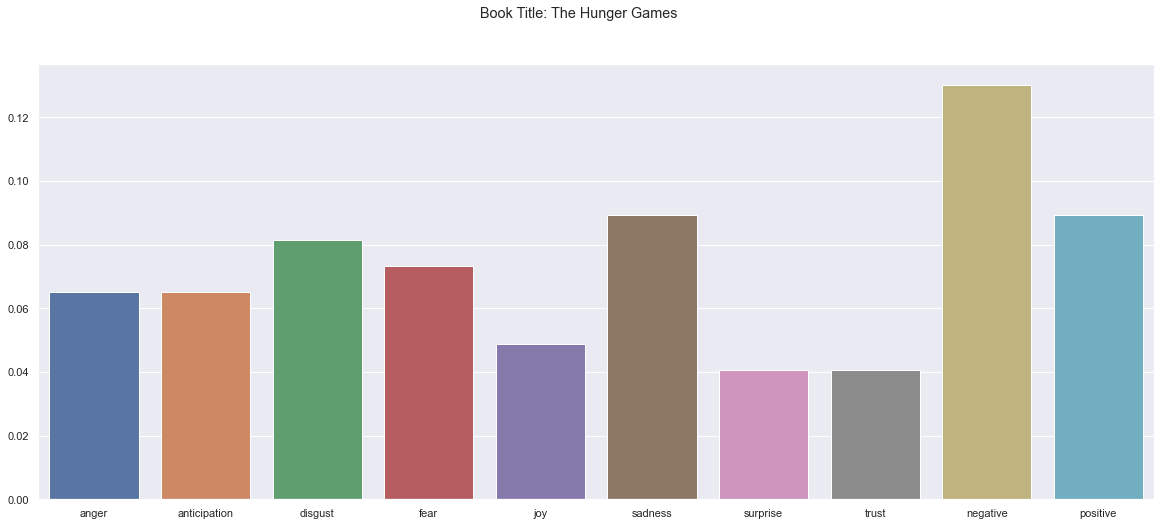

In [176]:
fig, axes = plt.subplots(figsize=(20,8))
sns.barplot(x = viz_ex.columns.values, y = viz_ex.values[0])
fig.suptitle("Book Title: The Hunger Games")

# Sentiment value to Word Copunt

<AxesSubplot:xlabel='word_count', ylabel='sentiment_value'>

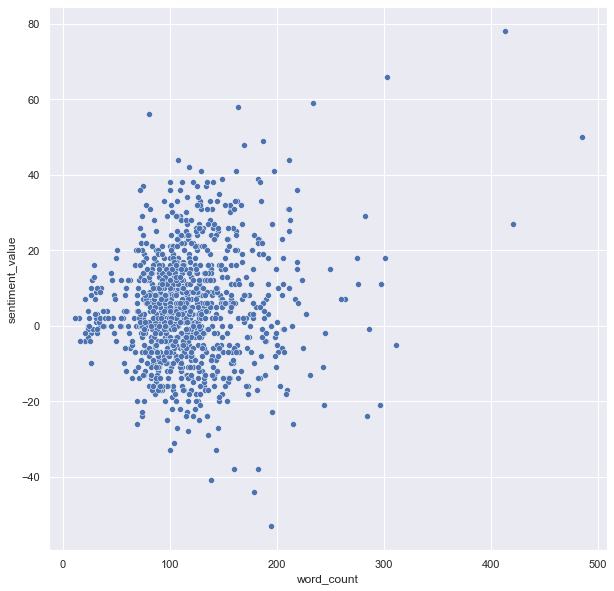

In [127]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=books_data, x="word_count", y="sentiment_value")

In [134]:
books_data.sentiment_value.describe()

count    1084.000000
mean        4.488007
std        14.551746
min       -53.000000
25%        -5.000000
50%         4.000000
75%        12.000000
max        78.000000
Name: sentiment_value, dtype: float64

In [139]:
books_data['Sentiment_Class'] = pd.cut(x=books_data['sentiment_value'],bins=[-53, -1, 0, 78], 
                                    labels=['Negative','Neutral','Positive'], right = True)
books_data[["title", "author", "sentiment_value", "Sentiment_Class"]]

,title,author,sentiment_value,Sentiment_Class
0,The Hunger Games,Suzanne Collins,-22,Negative
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,1,Positive
2,To Kill a Mockingbird,Harper Lee,24,Positive
3,Pride and Prejudice,Jane Austen,38,Positive
4,The Book Thief,Markus Zusak,-3,Negative
...,...,...,...,...
1079,The Raven and Other Poems,Edgar Allan Poe,-4,Negative
1080,Mother Night,Kurt Vonnegut Jr.,-11,Negative
1081,Kushiel's Dart,Jacqueline Carey,19,Positive
1082,The Choice,Nicholas Sparks,41,Positive


In [141]:
emotions_df

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,8,8,10,9,6,16,11,11,5,5
1,14,7,5,15,6,18,18,13,5,10
2,2,4,2,5,8,8,15,5,1,2
3,5,15,2,3,22,8,26,0,3,15
4,3,5,3,7,3,9,11,4,4,11
...,...,...,...,...,...,...,...,...,...,...
1079,0,2,0,1,2,1,4,1,2,2
1080,10,6,3,12,8,17,14,7,0,12
1081,9,13,7,13,24,15,43,9,14,18
1082,0,15,0,2,19,5,32,2,10,14


In [145]:
books_data_sentiment = pd.concat([books_data[["title", "summary", "sentiment_value", "Sentiment_Class"]], emotions_df], axis=1)


In [146]:
books_data_sentiment.head(10)

,title,summary,sentiment_value,Sentiment_Class,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,The Hunger Games,"Could you survive on your own in the wild, wit...",-22,Negative,8,8,10,9,6,16,11,11,5,5
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,1,Positive,14,7,5,15,6,18,18,13,5,10
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,24,Positive,2,4,2,5,8,8,15,5,1,2
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,38,Positive,5,15,2,3,22,8,26,0,3,15
4,The Book Thief,Librarian's note: An alternate cover edition c...,-3,Negative,3,5,3,7,3,9,11,4,4,11
5,Twilight,About three things I was absolutely positive.F...,12,Positive,0,2,0,2,4,3,4,0,0,0
6,Animal Farm,Librarian's note: There is an Alternate Cover ...,18,Positive,4,10,2,5,8,5,16,4,1,7
7,The Chronicles of Narnia,Librarian note: An alternate cover for this ed...,26,Positive,4,9,2,4,7,4,22,0,4,13
8,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"This four-volume, boxed set contains J.R.R. To...",20,Positive,2,8,4,5,5,6,21,0,7,6
9,The Fault in Our Stars,Despite the tumor-shrinking medical miracle th...,25,Positive,2,9,3,8,9,12,16,6,5,10


In [182]:
def new_column(data):
    if data['negative'] < data['positive']:
        return "Positive"
    elif data['negative'] > data['positive']:
        return "Negative"
    else:
        return "Neutral"

In [183]:
books_data_sentiment['sentiment_class'] = books_data_sentiment.apply(new_column, axis=1)

In [185]:
books_data_sentiment.columns.values

array(['title', 'summary', 'sentiment_value', 'Sentiment_Class', 'anger',
       'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive',
       'sadness', 'surprise', 'trust', 'sentiment_class'], dtype=object)

In [190]:
books_data_labeled= books_data_sentiment[['title','summary','anger','anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive','sadness', 'surprise', 'trust', 'sentiment_class']]

In [191]:
books_data_labeled.to_csv("model_data.csv")